In [25]:
#いまさらながらKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.mixture import BayesianGaussianMixture
from sklearn.manifold import TSNE
import umap

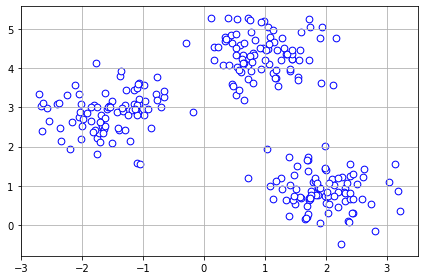

In [49]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X,y = make_blobs(n_samples=265,
                 n_features=2,#特徴量の数
                 centers=3,#クラスタの個数
                 cluster_std=0.5,#クラスタ内の分布の標準偏差
                 shuffle=True,#shuffle data
                 random_state=0)

#plot
plt.scatter(X[:,0],X[:,1],c='white',marker='o',edgecolor='b',s=45)
plt.grid()
plt.tight_layout()

C:\Users\unlea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


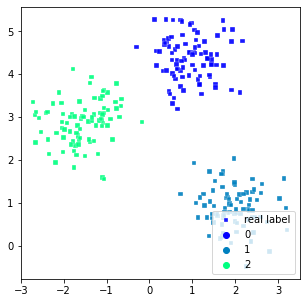

In [76]:
km = KMeans(n_clusters=3,#cluster num
            init='k-means++',#重心初期点を互いになるべく離れた位置に配置するようKMeans++
            max_iter=500,#収束までに繰り返すイタレーション数
            tol=1e-4,#クラスタ内SSEが、この値以上に小さくならない、つまり改善しないならそこでイテレーションstop
            n_init=25,#そのつど異なるセントロイドを使ってクラスタリングを25回実行し、最もイナーシャ(重心とのSSE和)が小さいモデルを採択
            random_state=0)

#ラベルの予測をfit_predictで予測
y_km = km.fit_predict(X)

#実際の正解ラベルと比べてどうであった？
plt.figure(figsize=(5,5))
sns.scatterplot(X[:,0],X[:,1],hue=y,marker='s',palette='winter',alpha=.9,s=20,label='real label')

plt.legend(loc='lower right')

C:\Users\unlea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

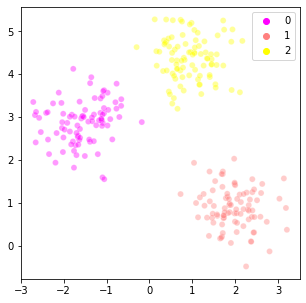

In [77]:
plt.figure(figsize=(5,5))
sns.scatterplot(X[:,0],X[:,1],hue=y_km,marker='o',palette='spring',alpha=.4)